In [239]:
import datetime as dt
import glob
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import xarray as xr

%matplotlib inline

In [3]:
bathy = xr.open_dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
Bathy = bathy.Bathymetry

In [6]:
pti, ptj = 635, 175

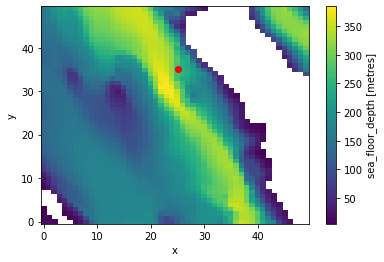

In [10]:
Bathy[600:650, 150:200].plot();
plt.plot(ptj-150, pti-600, 'ro');

In [14]:
bathy.close()

In [210]:
meshfile = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
deptht = meshfile.gdept_1d.values
meshfile.close()

## GRID T File

In [3]:
tracers = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DTracerFields1hV19-05')

In [4]:
time_slice_2018 = slice('2018-04-1 12:00:00', '2018-08-31 12:00:00', 24)
time_slice_2019 = slice('2019-04-1 12:00:00', '2019-08-31 12:00:00', 24)
time_slice_2020 = slice('2020-04-1 12:00:00', '2020-08-31 12:00:00', 24)

In [25]:
temp_2020 = tracers.temperature.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2020).isel(depth=slice(0, 3)).mean(axis=1)

In [7]:
temp_2018 = tracers.temperature.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2018).isel(depth=slice(0, 3)).mean(axis=1)

In [18]:
temp_2018['time2020'] = temp_2018.time +  np.timedelta64(dt.date(2020, 4, 1) - dt.date(2018, 4, 1))

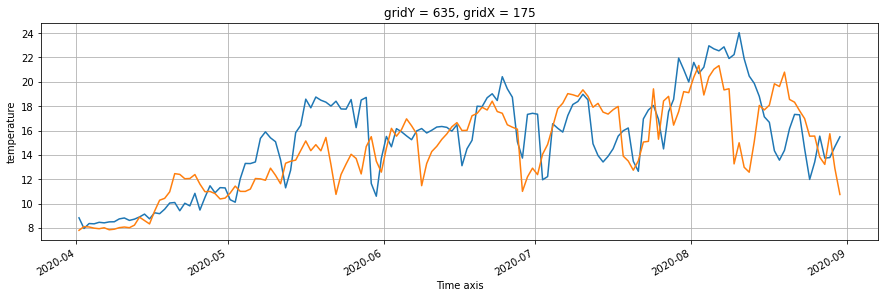

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(temp_2018.time2020, temp_2018)
temp_2020.plot(ax=ax)
ax.grid();

In [27]:
sal_2020 = tracers.salinity.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2020).isel(depth=slice(0, 3)).mean(axis=1)

In [29]:
sal_2018 = tracers.salinity.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2018).isel(depth=slice(0, 3)).mean(axis=1)

In [30]:
sal_2018['time2020'] = sal_2018.time +  np.timedelta64(dt.date(2020, 4, 1) - dt.date(2018, 4, 1))

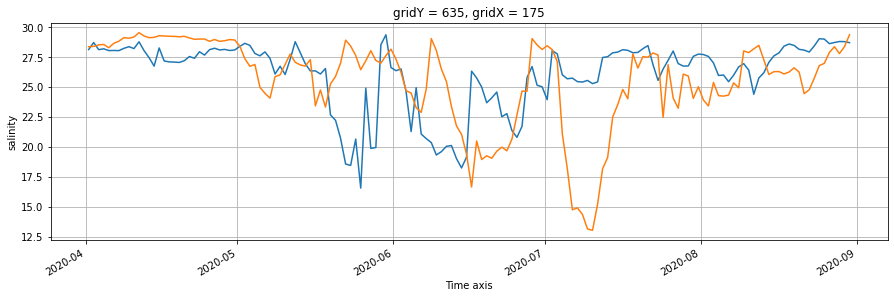

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(sal_2018.time2020, sal_2018)
sal_2020.plot(ax=ax)
ax.grid();

In [34]:
tracers.close()

## PTRC file

In [116]:
bio = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DBiologyFields1hV19-05')

In [117]:
nitrate_2020 = bio.nitrate.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2020).isel(depth=slice(0, 10)).mean(axis=1)

In [118]:
nitrate_2018 = bio.nitrate.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2018).isel(depth=slice(0, 10)).mean(axis=1)

In [119]:
nitrate_2018['time2020'] = nitrate_2018.time +  np.timedelta64(dt.date(2020, 4, 1) - dt.date(2018, 4, 1))

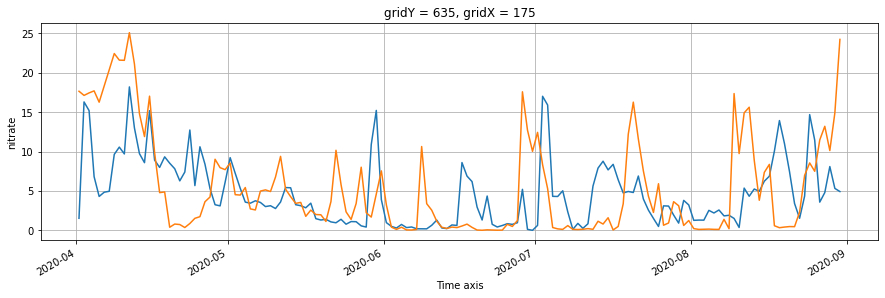

In [120]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(nitrate_2018.time2020, nitrate_2018)
ax.set_title('Nitrate')
nitrate_2020.plot(ax=ax)
ax.grid();

In [125]:
flag_2020 = bio.flagellates.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2020).isel(depth=slice(0, 25)).mean(axis=1)

In [126]:
flag_2018 = bio.flagellates.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2018).isel(depth=slice(0, 25)).mean(axis=1)
flag_2018['time2020'] = flag_2018.time +  np.timedelta64(dt.date(2020, 4, 1) - dt.date(2018, 4, 1))

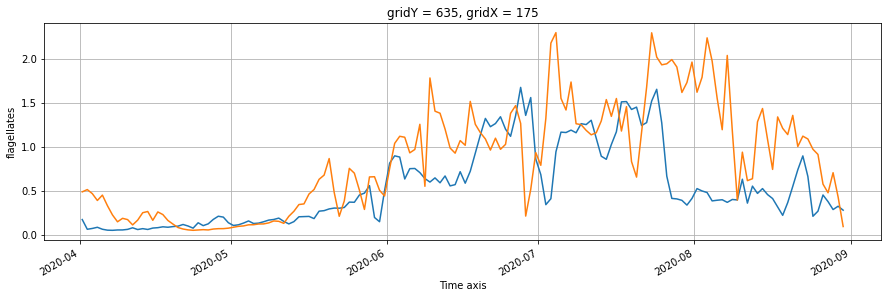

In [127]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(flag_2018.time2020, flag_2018)
ax.set_title('Flagellates')
flag_2020.plot(ax=ax)
ax.grid();

In [128]:
mzoo_2020 = bio.microzooplankton.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2020).isel(depth=slice(0, 25)).mean(axis=1)

In [129]:
mzoo_2018 = bio.microzooplankton.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2018).isel(depth=slice(0, 25)).mean(axis=1)
mzoo_2018['time2020'] = mzoo_2018.time +  np.timedelta64(dt.date(2020, 4, 1) - dt.date(2018, 4, 1))

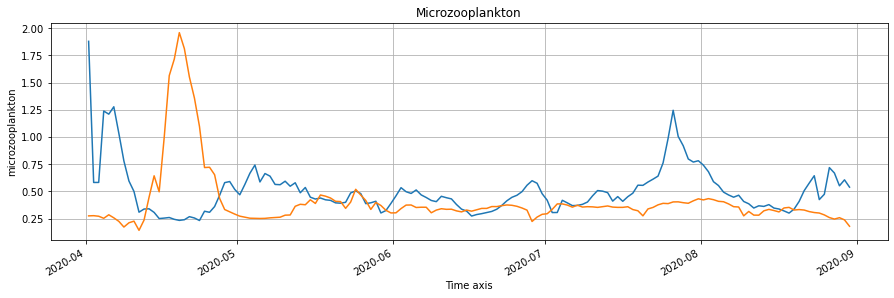

In [130]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(mzoo_2018.time2020, mzoo_2018)
mzoo_2020.plot(ax=ax)
ax.set_title("Microzooplankton")
ax.grid();

In [121]:
diat_2020 = bio.diatoms.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2020).isel(depth=slice(0, 25)).mean(axis=1)

In [122]:
diat_2018 = bio.diatoms.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2018).isel(depth=slice(0, 25)).mean(axis=1)
diat_2018['time2020'] = diat_2018.time +  np.timedelta64(dt.date(2020, 4, 1) - dt.date(2018, 4, 1))

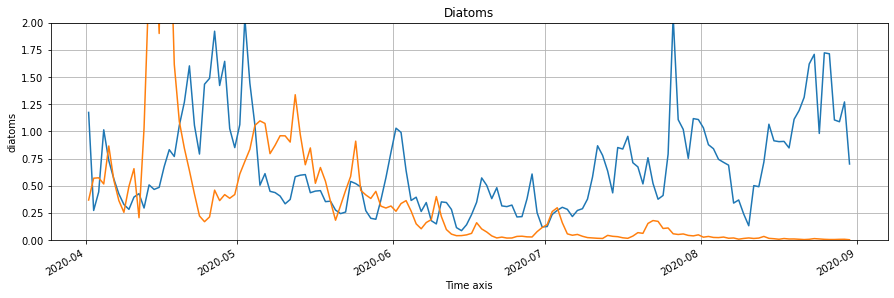

In [123]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(diat_2018.time2020, diat_2018)
diat_2020.plot(ax=ax)
ax.set_title('Diatoms')
ax.set_ylim(0, 2)
ax.grid();

In [131]:
bio.close()

## DIA file

In [57]:
directory = 'nowcast-green.201905'
dir_path = Path(f"/results2/SalishSea/{directory}")

In [58]:
drop_vars = [
    "time_centered",
    "time_centered_bounds",
    "time_counter_bounds",
    "nav_lat",
    "bounds_lat",
    "nav_lon",
    "bounds_lon",
    "area",
    "deptht_bounds",
]
chunks = {
    "time_counter": 1,
    "deptht": 1,
}

In [133]:
def prep_timeseries(dir_path, file_pattern, n_days): 
    ds_files = sorted(dir_path.glob(file_pattern))
    ds = xr.open_mfdataset(
        ds_files[:n_days],
        chunks=chunks,
        drop_variables=drop_vars,
    )
    timeseries = ds.isel(deptht = slice(20), y = pti, 
                             x = ptj).mean(axis=1)
    
    return timeseries

In [134]:
year = 2020
months_regex = '0[45678]'
file_pattern = f"*/SalishSea_1d_{year}{months_regex}*dia2_T*.nc"
timeseries = prep_timeseries(dir_path, file_pattern, -1)

In [135]:
timeseries

<xarray.Dataset>
Dimensions:         (time_counter: 152)
Dimensions without coordinates: time_counter
Data variables:
    bounds_nav_lon  (time_counter) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    bounds_nav_lat  (time_counter) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    HetMRub         (time_counter) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    MORTPHY         (time_counter) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    MORTMRUB        (time_counter) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    MORTDIAT        (time_counter) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    GRMESZDIAT      (time_counter) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    GRMESZMRUB      (time_counter) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    GRMESZPHY       (time_counter) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    GRMESZPON       (time_counter) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    GRMESZMICZ      (time_counter) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    GRMICZDIAT      (time_counter) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    GRMICZMRUB      (time_counter) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    GRMICZPHY       (time_counter) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    GRMICZPON       (time_counter) float32 dask.array<chunksize=(1,), meta=np.ndarray>
    GRMICZMICZ      (time_counter) float32 dask.array<chunksize=(1,), meta=np.ndarray>

In [136]:
timeseries.load(scheduler='processes', num_workers=4);

In [140]:
year = 2018
months_regex = '0[45678]'
file_pattern = f"*/SalishSea_1d_{year}{months_regex}*dia2_T*.nc"
timeseries_2018 = prep_timeseries(dir_path, file_pattern, -1)

In [141]:
timeseries_2018.load(scheduler='processes', num_workers=4);

In [77]:
timeseries.GRMESZDIAT.values/diat_2020.values

array([3.60556237e-06, 3.59973842e-06, 4.00883891e-06, 3.12012912e-06,
       2.72095463e-06, 3.32510717e-06, 3.33289108e-06, 1.96779979e-06,
       1.72099385e-06, 1.26569910e-06, 2.35052767e-06, 1.25782822e-06,
       1.45623346e-06, 1.73607384e-06, 1.72416480e-06, 1.40999953e-06,
       1.63142806e-06, 2.54209704e-06, 2.37433778e-06, 2.06766708e-06,
       1.87613557e-06, 2.09530322e-06, 2.39847759e-06, 2.72514694e-06,
       2.90211733e-06, 3.53306632e-06, 5.27729117e-06, 4.46236709e-06,
       4.86109411e-06, 5.63356662e-06, 5.25036330e-06, 5.40174187e-06,
       5.84666896e-06, 6.11121322e-06, 6.14597548e-06, 4.84246084e-06,
       4.87588386e-06, 4.23718575e-06, 5.31703927e-06, 2.94969800e-06,
       1.61021762e-06, 2.77026106e-06, 5.98800443e-06, 4.12611098e-06,
       4.32910883e-06, 3.04098012e-06, 6.46007447e-06, 5.14129260e-06,
       6.01157990e-06, 8.24256495e-06, 5.54729377e-06, 3.72745308e-06,
       4.72705369e-06, 4.65893208e-06, 5.23549352e-06, 5.86668739e-06,
      

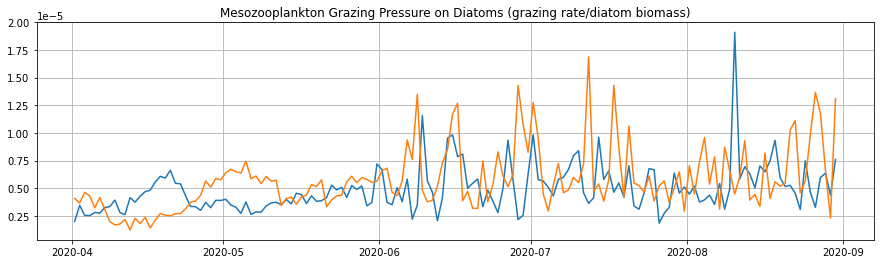

In [157]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(diat_2018.time2020, timeseries_2018.GRMESZDIAT.values/diat_2018.values)
ax.plot(diat_2020.time, timeseries.GRMESZDIAT.values/diat_2020.values)
ax.set_title('Mesozooplankton Grazing Pressure on Diatoms (grazing rate/diatom biomass)')
ax.grid();

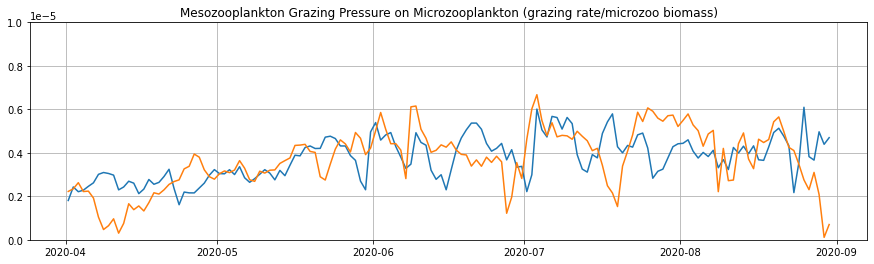

In [156]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(mzoo_2018.time2020, timeseries_2018.GRMESZMICZ.values/mzoo_2018.values)
ax.plot(mzoo_2020.time, timeseries.GRMESZMICZ.values/mzoo_2020.values)
ax.set_title('Mesozooplankton Grazing Pressure on Microzooplankton (grazing rate/microzoo biomass)')
ax.set_ylim(0, 1e-5)
ax.grid();

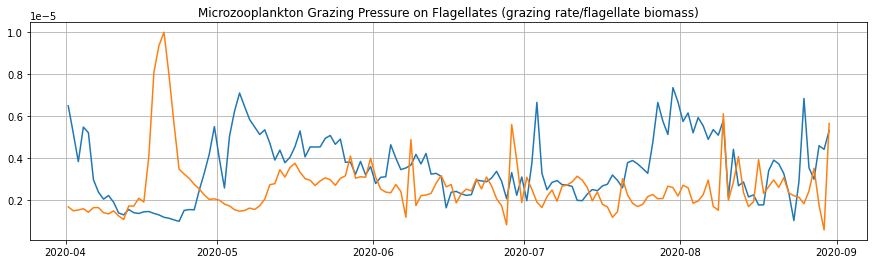

In [155]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(flag_2018.time2020, timeseries_2018.GRMICZPHY.values/flag_2018.values)
ax.plot(flag_2020.time, timeseries.GRMICZPHY.values/flag_2020.values)
ax.set_title('Microzooplankton Grazing Pressure on Flagellates (grazing rate/flagellate biomass)')
#ax.set_ylim(0, 1e-4)
ax.grid();

In [65]:
timeseries

<xarray.Dataset>
Dimensions:         (nvertex: 4, time_counter: 29)
Coordinates:
    deptht          float32 1.5
  * time_counter    (time_counter) datetime64[ns] 2020-04-01T12:00:00 ... 202...
Dimensions without coordinates: nvertex
Data variables:
    bounds_nav_lon  (time_counter, nvertex) float32 -124.6 -124.6 ... -124.6
    bounds_nav_lat  (time_counter, nvertex) float32 49.69 49.69 ... 49.7 49.7
    HetMRub         (time_counter) float32 2.251e-08 3.011e-08 ... 0.0 0.0
    MORTPHY         (time_counter) float32 1.357e-07 1.546e-07 ... 2.038e-08
    MORTMRUB        (time_counter) float32 5.233e-08 6.238e-08 ... 7.194e-08
    MORTDIAT        (time_counter) float32 1.704e-07 2.705e-07 ... 1.969e-07
    GRMESZDIAT      (time_counter) float32 2.192e-06 3.384e-06 ... 2.584e-06
    GRMESZMRUB      (time_counter) float32 3.816e-07 4.425e-07 ... 5.339e-07
    GRMESZPHY       (time_counter) float32 8.944e-07 9.914e-07 ... 1.367e-07
    GRMESZPON       (time_counter) float32 3.246e-07 2.468e-07 ... 4.108e-07
    GRMESZMICZ      (time_counter) float32 7.918e-07 9.563e-07 ... 9.945e-07
    GRMICZDIAT      (time_counter) float32 7.803e-07 1.086e-06 ... 1.219e-06
    GRMICZMRUB      (time_counter) float32 0.0 1.499e-08 ... 1.361e-07 3.38e-08
    GRMICZPHY       (time_counter) float32 9.281e-07 9.295e-07 ... 1.704e-07
    GRMICZPON       (time_counter) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    GRMICZMICZ      (time_counter) float32 2.689e-07 2.457e-07 ... 4.43e-07
Attributes:
    name:         SalishSea_1d_20200401_20200401_dia2_T
    description:  smelt diagnostics B
    title:        smelt diagnostics B
    Conventions:  CF-1.6
    timeStamp:    2020-Apr-01 18:17:52 GMT
    uuid:         441e7dbd-ff92-4954-808d-8acb18b66e23

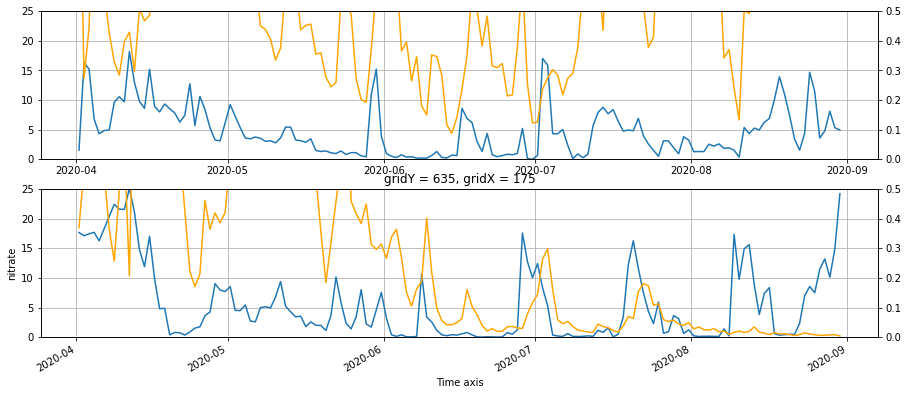

In [132]:
fig, axs = plt.subplots(2, 1, figsize=(15, 6))
axs[0].plot(nitrate_2018.time2020, nitrate_2018)
ax0 = axs[0].twinx()
ax1 = axs[1].twinx()
nitrate_2020.plot(ax=axs[1])
ax0.plot(diat_2018.time2020, diat_2018,  color='orange')
ax1.plot(diat_2020.time, diat_2020, color='orange')
for ax in axs:
    ax.grid();
    ax.set_ylim(0, 25)
for ax in [ax0, ax1]:
    ax.set_ylim(0, 0.5)

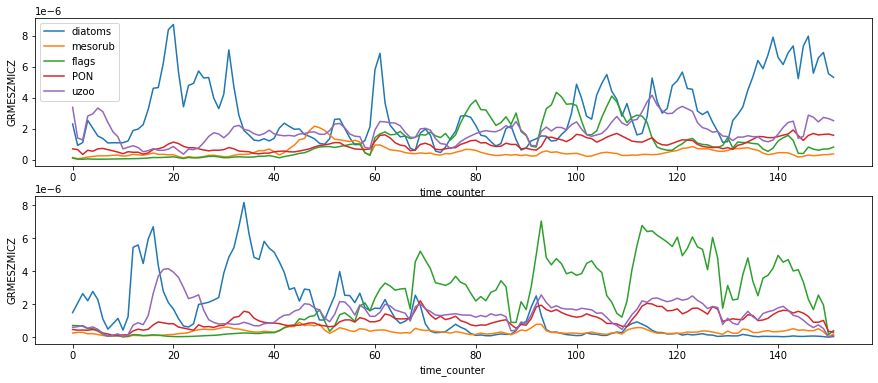

In [247]:
fig, axs = plt.subplots(2, 1, figsize=(15, 6))
timeseries_2018.GRMESZDIAT.plot(ax=axs[0], label='diatoms')
timeseries_2018.GRMESZMRUB.plot(ax=axs[0], label='mesorub')
timeseries_2018.GRMESZPHY.plot(ax=axs[0], label='flags')
timeseries_2018.GRMESZPON.plot(ax=axs[0], label='PON')
timeseries_2018.GRMESZMICZ.plot(ax=axs[0], label='uzoo')
timeseries.GRMESZDIAT.plot(ax=axs[1])
timeseries.GRMESZMRUB.plot(ax=axs[1])
timeseries.GRMESZPHY.plot(ax=axs[1])
timeseries.GRMESZPON.plot(ax=axs[1])
timeseries.GRMESZMICZ.plot(ax=axs[1])
axs[0].legend();

In [159]:
auxds = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DAuxiliaryFields1hV19-05')

In [173]:
time_noon_2018 = slice('2018-04-1 20:00:00', '2018-08-31 20:00:00', 24)
time_noon_2020 = slice('2020-04-1 20:00:00', '2020-08-31 20:00:00', 24)

In [174]:
par_2020 = auxds.PAR.isel(
    gridY=pti, gridX=ptj).sel(
    time=time_noon_2020).isel(depth=1)

In [175]:
par_2018 = auxds.PAR.isel(
    gridY=pti, gridX=ptj).sel(
    time=time_noon_2018).isel(depth=1)

In [176]:
par_2018['time2020'] = par_2018.time +  np.timedelta64(dt.date(2020, 4, 1) - dt.date(2018, 4, 1))

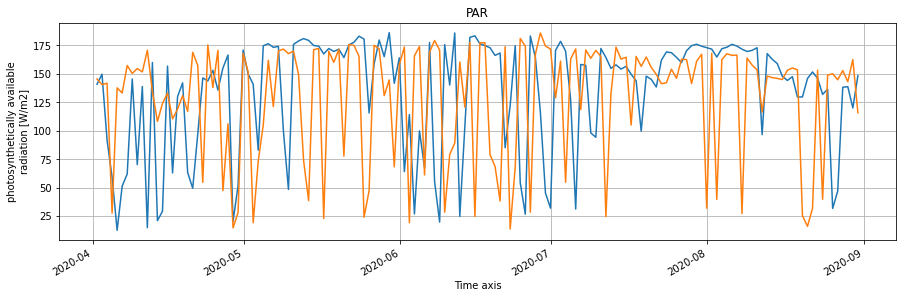

In [177]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
ax.plot(par_2018.time2020, par_2018)
par_2020.plot(ax=ax)
ax.set_title('PAR')
#ax.set_ylim(0, 1)
ax.grid();

In [180]:
par_2018[(par_2018.time >= np.datetime64(dt.datetime(2018, 6, 1))) & 
         (par_2018.time <= np.datetime64(dt.datetime(2018, 7, 1)))].sum()

<xarray.DataArray 'PAR' ()>
array(3481.9016, dtype=float32)
Coordinates:
    depth    float32 1.5
    gridY    int16 635
    gridX    int16 175

In [181]:
par_2020[(par_2020.time >= np.datetime64(dt.datetime(2020, 6, 1))) & 
         (par_2020.time <= np.datetime64(dt.datetime(2020, 7, 1)))].sum()

<xarray.DataArray 'PAR' ()>
array(3670.6155, dtype=float32)
Coordinates:
    depth    float32 1.5
    gridY    int16 635
    gridX    int16 175

In [182]:
auxds.close()

In [183]:
diat_2018 = bio.diatoms.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2018).isel(depth=slice(0, 25))
diat_2018['time2020'] = diat_2018.time +  np.timedelta64(dt.date(2020, 4, 1) - dt.date(2018, 4, 1))

In [184]:
diat_2020 = bio.diatoms.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2020).isel(depth=slice(0, 25))


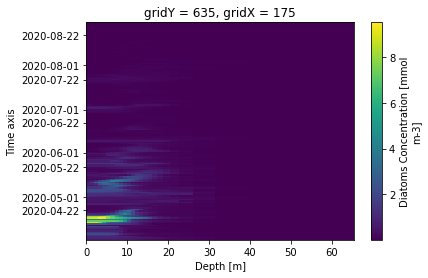

In [185]:
diat_2020.plot()

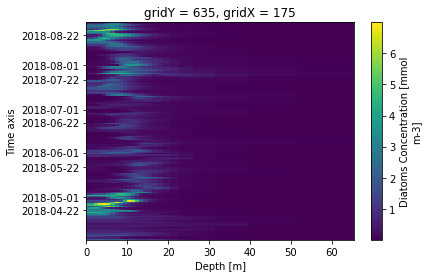

In [186]:
diat_2018.plot()

In [189]:
nitrate_2020 = bio.nitrate.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2020).isel(depth=slice(0, 25))


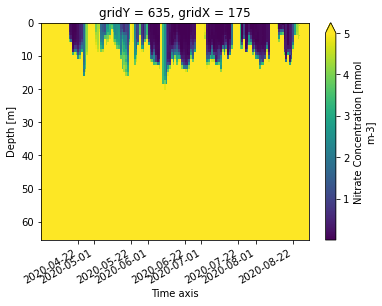

In [225]:
nitrate_2020.transpose().plot(yincrease=False, vmax=5);

In [191]:
nitrate_2018 = bio.nitrate.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2018).isel(depth=slice(0, 25))
nitrate_2018['time2020'] = nitrate_2018.time +  np.timedelta64(dt.date(2020, 4, 1) - dt.date(2018, 4, 1))

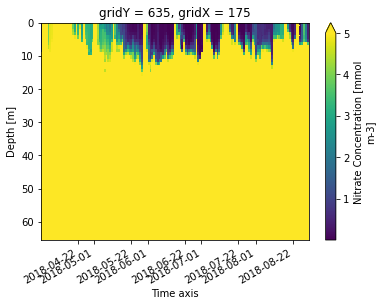

In [227]:
nitrate_2018.transpose().plot(yincrease=False, vmax=5);

In [195]:
nitrate_2020.load()

<xarray.DataArray 'nitrate' (time: 152, depth: 25)>
array([[17.620735 , 17.621471 , 17.622969 , ..., 26.22036  , 26.892635 ,
        26.937801 ],
       [16.917133 , 16.916552 , 16.916136 , ..., 26.08016  , 26.593441 ,
        26.831251 ],
       [17.40365  , 17.404623 , 17.406588 , ..., 26.318373 , 26.608507 ,
        26.868788 ],
       ...,
       [ 6.2861676,  6.4577627,  7.1180415, ..., 26.265078 , 27.24553  ,
        27.845978 ],
       [13.746627 , 13.750919 , 13.759945 , ..., 26.432415 , 27.292603 ,
        27.828247 ],
       [24.21298  , 24.212313 , 24.211306 , ..., 26.398907 , 27.40368  ,
        27.9011   ]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2020-04-01T12:30:00 ... 2020-08-30T12:30:00
  * depth    (depth) float32 0.5 1.5 2.5 3.5 4.5 ... 28.23 34.69 44.52 58.48
    gridY    int16 635
    gridX    int16 175
Attributes:
    _ChunkSizes:            [  1  40 898 398]
    colorBarMaximum:        40.0
    colorBarMinimum:        0.0
    coverage_content_type:  modelResult
    ioos_category:          dissolved_nutrients
    long_name:              Nitrate Concentration
    standard_name:          mole_concentration_of_nitrate_in_sea_water
    units:                  mmol m-3

In [196]:
nitrate_2018.load()

<xarray.DataArray 'nitrate' (time: 152, depth: 25)>
array([[ 0.98818547,  0.9911046 ,  0.9967848 , ..., 25.759169  ,
        26.32809   , 26.589634  ],
       [14.936427  , 14.941709  , 14.952289  , ..., 26.483845  ,
        26.533916  , 26.661947  ],
       [ 7.8591423 ,  7.9388785 , 10.750222  , ..., 26.281734  ,
        26.417526  , 26.579445  ],
       ...,
       [ 3.6437573 ,  3.632071  ,  3.6065767 , ..., 25.701866  ,
        26.926199  , 27.425863  ],
       [ 2.12823   ,  2.1291468 ,  2.1338983 , ..., 26.517073  ,
        27.062891  , 27.428751  ],
       [ 0.4440869 ,  0.44482777,  0.4462496 , ..., 26.512619  ,
        27.366796  , 27.459433  ]], dtype=float32)
Coordinates:
  * time      (time) datetime64[ns] 2018-04-01T12:30:00 ... 2018-08-30T12:30:00
  * depth     (depth) float32 0.5 1.5 2.5 3.5 4.5 ... 28.23 34.69 44.52 58.48
    gridY     int16 635
    gridX     int16 175
    time2020  (time) datetime64[ns] 2020-04-01T12:30:00 ... 2020-08-30T12:30:00
Attributes:
    _ChunkSizes:            [  1  40 898 398]
    colorBarMaximum:        40.0
    colorBarMinimum:        0.0
    coverage_content_type:  modelResult
    ioos_category:          dissolved_nutrients
    long_name:              Nitrate Concentration
    standard_name:          mole_concentration_of_nitrate_in_sea_water
    units:                  mmol m-3

In [200]:
nitrate_2020.values-nitrate_2018.values

array([[16.63255   , 16.630367  , 16.626184  , ...,  0.46119118,
         0.5645447 ,  0.34816742],
       [ 1.9807062 ,  1.974843  ,  1.9638472 , ..., -0.40368462,
         0.05952454,  0.1693039 ],
       [ 9.544508  ,  9.465744  ,  6.6563654 , ...,  0.03663826,
         0.19098091,  0.28934288],
       ...,
       [ 2.6424103 ,  2.8256917 ,  3.5114648 , ...,  0.56321144,
         0.31933022,  0.42011452],
       [11.618397  , 11.621773  , 11.626047  , ..., -0.08465767,
         0.22971153,  0.39949608],
       [23.768894  , 23.767485  , 23.765057  , ..., -0.11371231,
         0.03688431,  0.44166756]], dtype=float32)

<ipython-input-217-4cf66c3de38a>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = ax.pcolormesh(nitrate_2018.time2020, deptht[0, 0:25], (nitrate_2020.values-nitrate_2018.values).transpose(), cmap='bwr')


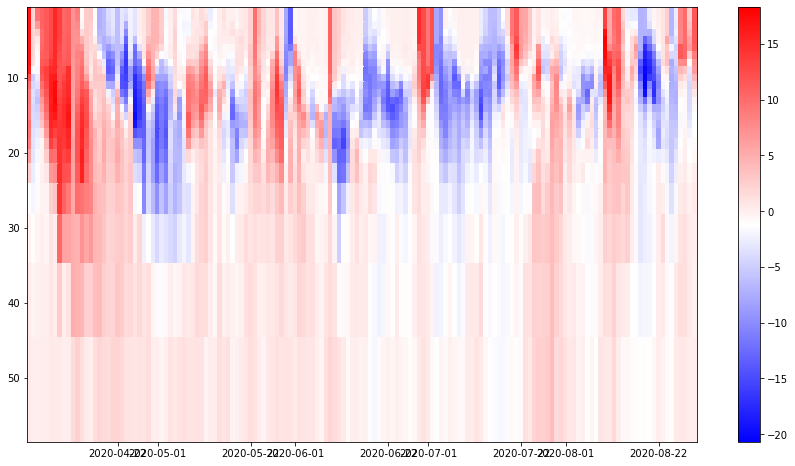

In [217]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
colours = ax.pcolormesh(nitrate_2018.time2020, deptht[0, 0:25], (nitrate_2020.values-nitrate_2018.values).transpose(), cmap='bwr')
fig.colorbar(colours);
ax.invert_yaxis();

<ipython-input-220-55a5fb9a2098>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = ax.pcolormesh(diat_2018.time2020, deptht[0, 0:25],


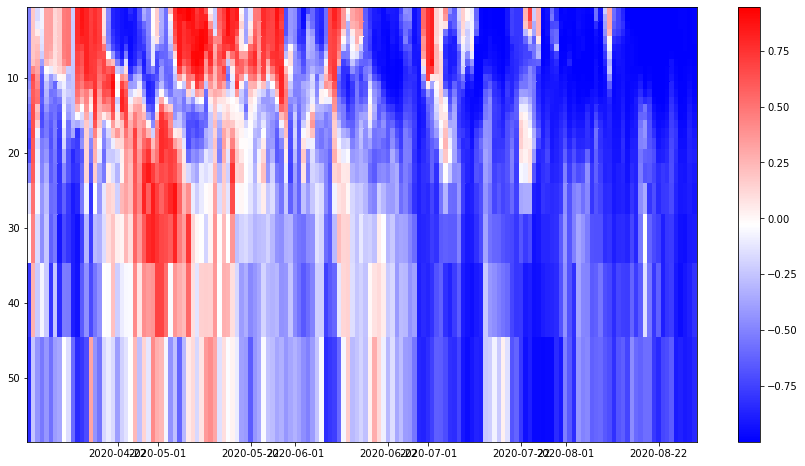

In [220]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
colours = ax.pcolormesh(diat_2018.time2020, deptht[0, 0:25], 
                        ((diat_2020.values-diat_2018.values)/
                         (diat_2020.values+diat_2018.values)).transpose(), cmap='bwr')
fig.colorbar(colours);
ax.invert_yaxis();

In [221]:
sal_2020 = tracers.salinity.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2020).isel(depth=slice(0, 25))

In [222]:
sal_2018 = tracers.salinity.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2018).isel(depth=slice(0, 25))

In [223]:
sal_2018['time2020'] = sal_2018.time +  np.timedelta64(dt.date(2020, 4, 1) - dt.date(2018, 4, 1))

<ipython-input-224-3c37714d2626>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = ax.pcolormesh(sal_2018.time2020, deptht[0, 0:25], (sal_2020.values-sal_2018.values).transpose(), cmap='bwr')


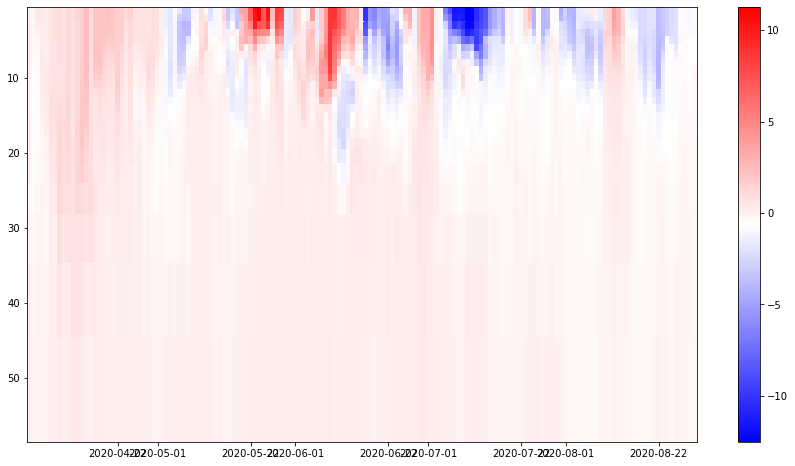

In [224]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
colours = ax.pcolormesh(sal_2018.time2020, deptht[0, 0:25], (sal_2020.values-sal_2018.values).transpose(), cmap='bwr')
fig.colorbar(colours);
ax.invert_yaxis();

In [228]:
flag_2018 = bio.flagellates.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2018).isel(depth=slice(0, 25))
flag_2018['time2020'] = flag_2018.time +  np.timedelta64(dt.date(2020, 4, 1) - dt.date(2018, 4, 1))

In [230]:
flag_2020 = bio.flagellates.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2020).isel(depth=slice(0, 25))

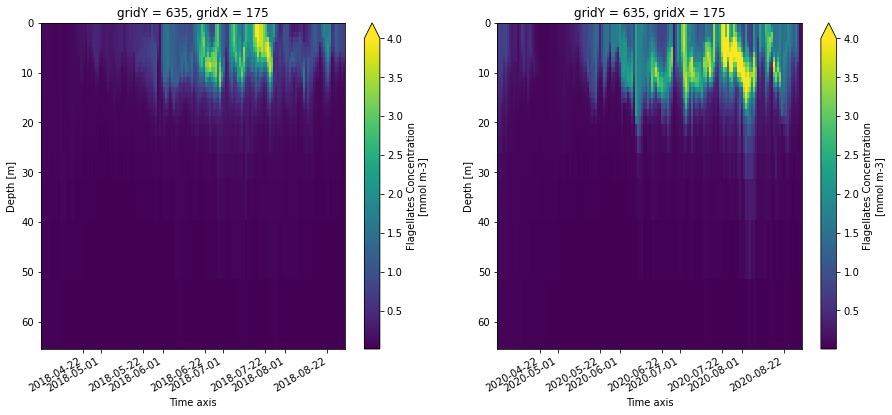

In [237]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
flag_2018.transpose().plot(yincrease=False, ax=axs[0], vmax=4);
flag_2020.transpose().plot(yincrease=False, ax=axs[1], vmax=4);

In [233]:
mzoo_2018 = bio.microzooplankton.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2018).isel(depth=slice(0, 25))
mzoo_2018['time2020'] = mzoo_2018.time +  np.timedelta64(dt.date(2020, 4, 1) - dt.date(2018, 4, 1))

In [234]:
mzoo_2020 = bio.microzooplankton.isel(gridY=pti, gridX=ptj).sel(time=time_slice_2020).isel(depth=slice(0, 25))

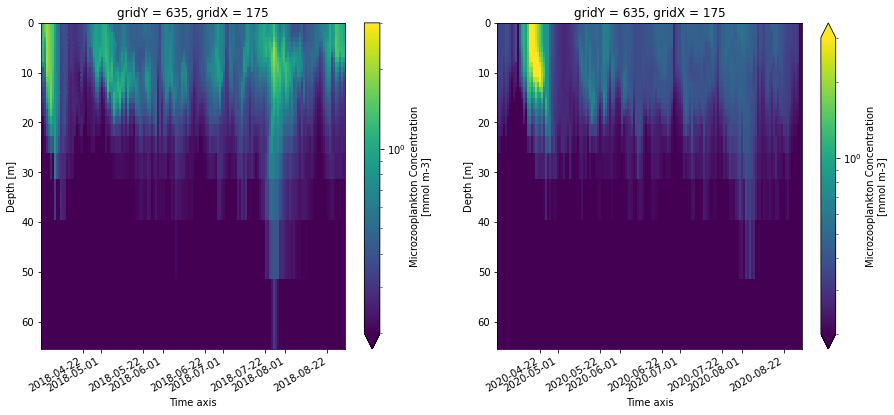

In [245]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
mzoo_2018.transpose().plot(yincrease=False, ax=axs[0], norm=colors.LogNorm(vmax=3, vmin=0.2));
mzoo_2020.transpose().plot(yincrease=False, ax=axs[1], norm=colors.LogNorm(vmax=3, vmin=0.2));

<ipython-input-248-c80fde300dec>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  colours = ax.pcolormesh(mzoo_2018.time2020, deptht[0, 0:25], (mzoo_2020.values-mzoo_2018.values).transpose(),


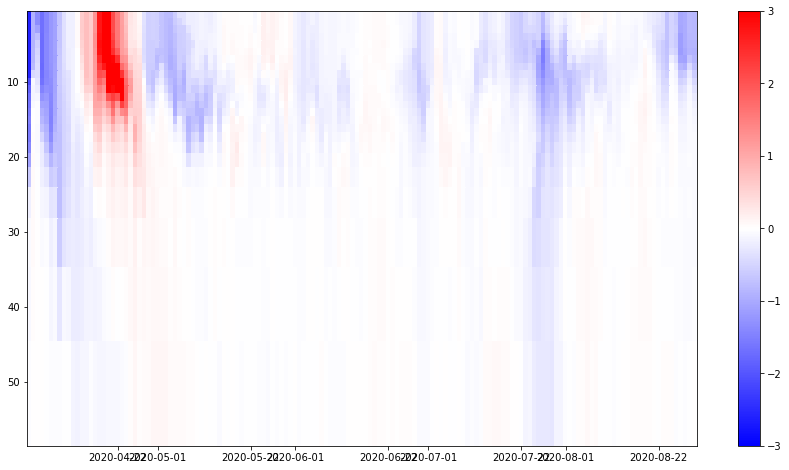

In [248]:
fig, ax = plt.subplots(1, 1, figsize=(15, 8))
colours = ax.pcolormesh(mzoo_2018.time2020, deptht[0, 0:25], (mzoo_2020.values-mzoo_2018.values).transpose(), 
                        cmap='bwr', vmax=3, vmin=-3)
fig.colorbar(colours);
ax.invert_yaxis();